In [1]:
from environments.single_stock import SingleStockEnv
from model_architecture.DQN_all import DQNAgents
from agent_training.train import train_agent
from visualisation.visualisation import visualize_trades_with_benchmark
from data_preperation.data_perp import prepare_data


In [2]:
df = prepare_data('CSCO')

env = SingleStockEnv(df)


                                Open       High        Low      Close  \
Date                                                                    
2020-02-27 00:00:00-05:00  35.583492  36.290335  34.488748  34.514610   
2020-02-28 00:00:00-05:00  33.359525  34.954229  33.057822  34.419788   
2020-03-02 00:00:00-05:00  34.609430  35.505911  33.549163  35.488670   
2020-03-03 00:00:00-05:00  35.566252  36.117937  34.230148  34.514610   
2020-03-04 00:00:00-05:00  35.100770  35.730032  34.307725  35.678310   

                             Volume  Dividends  Stock Splits        RSI  \
Date                                                                      
2020-02-27 00:00:00-05:00  51442900        0.0           0.0  18.407584   
2020-02-28 00:00:00-05:00  80188000        0.0           0.0  19.266035   
2020-03-02 00:00:00-05:00  48864300        0.0           0.0  21.311445   
2020-03-03 00:00:00-05:00  49294700        0.0           0.0  18.194490   
2020-03-04 00:00:00-05:00  30022100   

New best reward! Portfolio Value: 129110.10678041117 Total Reward: -174.19369358326932
New best reward! Portfolio Value: 127121.33637486194 Total Reward: 151.027945321996
New best reward! Portfolio Value: 133225.68764505006 Total Reward: 227.59660443980863
New best reward! Portfolio Value: 150490.5136920067 Total Reward: 230.19019653594512
Episode: 10, Reward: 256.90, Portfolio Value: $133979.43, Epsilon: 0.01
New best reward! Portfolio Value: 133979.43394589447 Total Reward: 256.9021231252773
New best reward! Portfolio Value: 147512.0180821168 Total Reward: 327.81425112443196
Episode: 20, Reward: 262.38, Portfolio Value: $137587.14, Epsilon: 0.01
New best reward! Portfolio Value: 162904.22639042346 Total Reward: 336.36980541864307
New best reward! Portfolio Value: 161424.0857553184 Total Reward: 392.36546148373014
Episode: 30, Reward: 402.38, Portfolio Value: $159002.66, Epsilon: 0.01
New best reward! Portfolio Value: 159002.66224844285 Total Reward: 402.37766013134865
Episode: 40, Re

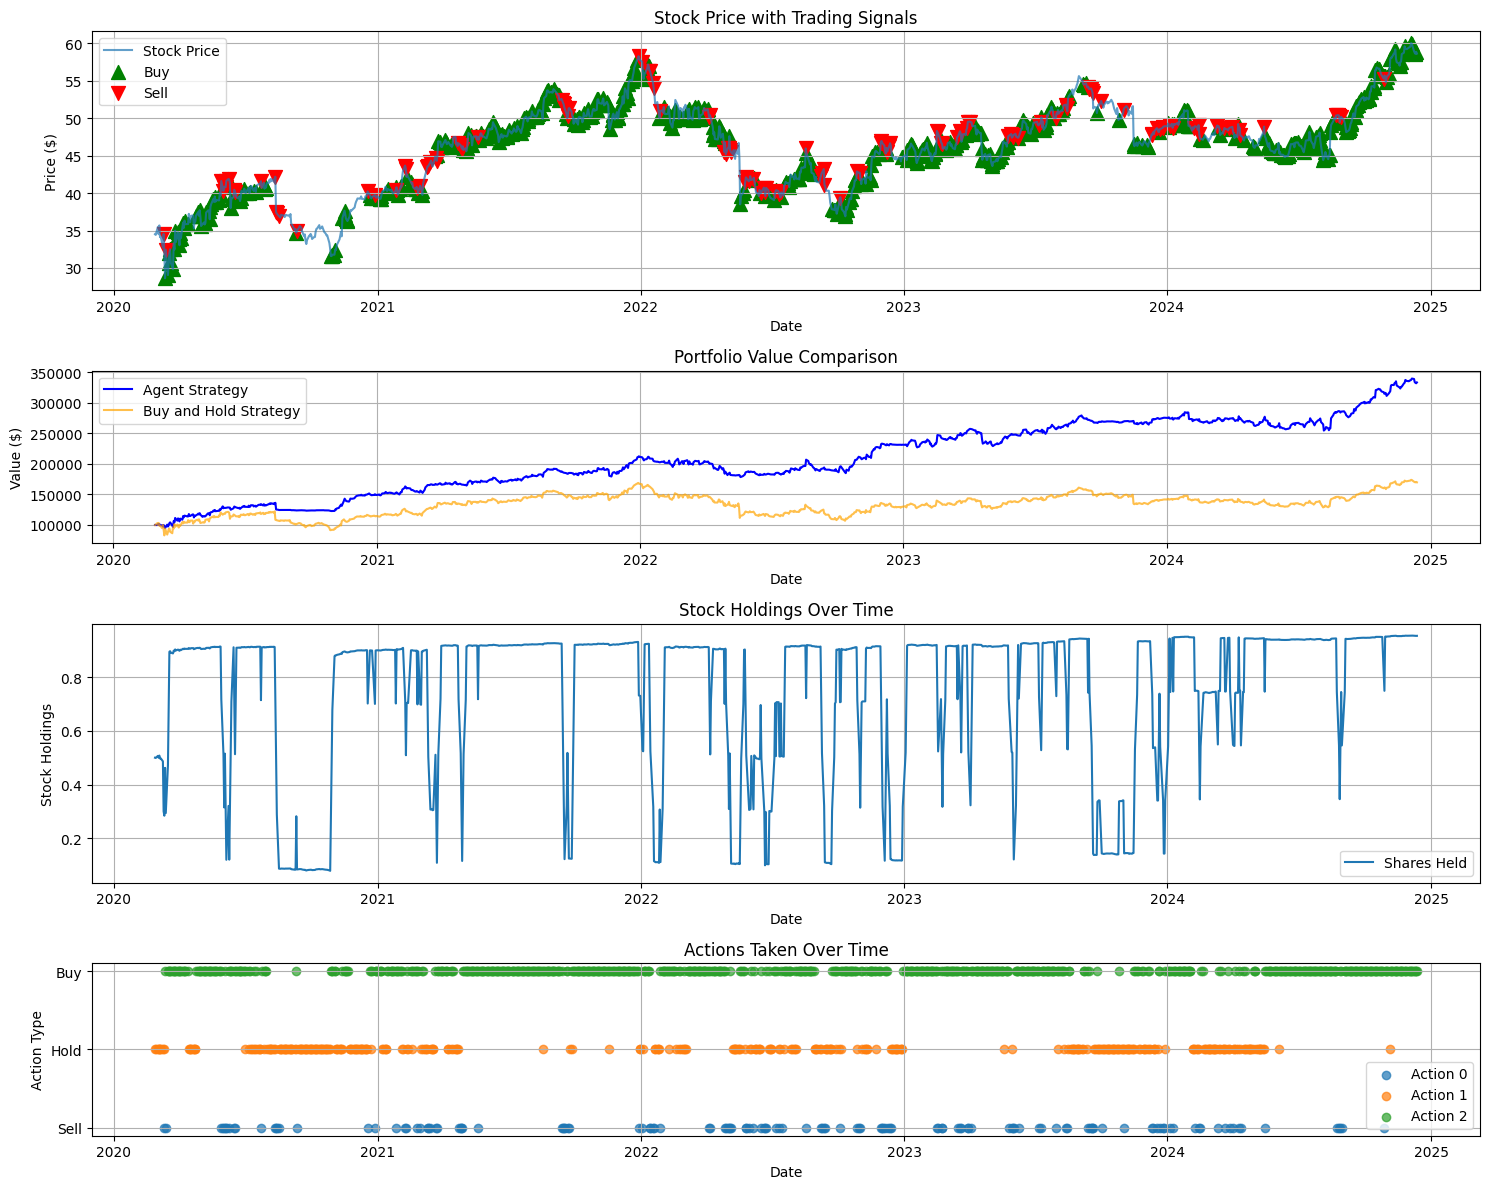


=== Performance Comparison ===
Initial Investment: $50,022.84

Agent Strategy:
Final Value: $333,579.91
Total Return: 566.86%
Number of Trades: 870

Buy and Hold Strategy:
Final Value: $169,918.71
Total Return: 239.68%

Risk Metrics:
Agent Sharpe Ratio: 0.97
Buy-Hold Sharpe Ratio: 0.54
Agent Maximum Drawdown: 16.02%
Buy-Hold Maximum Drawdown: 36.68%


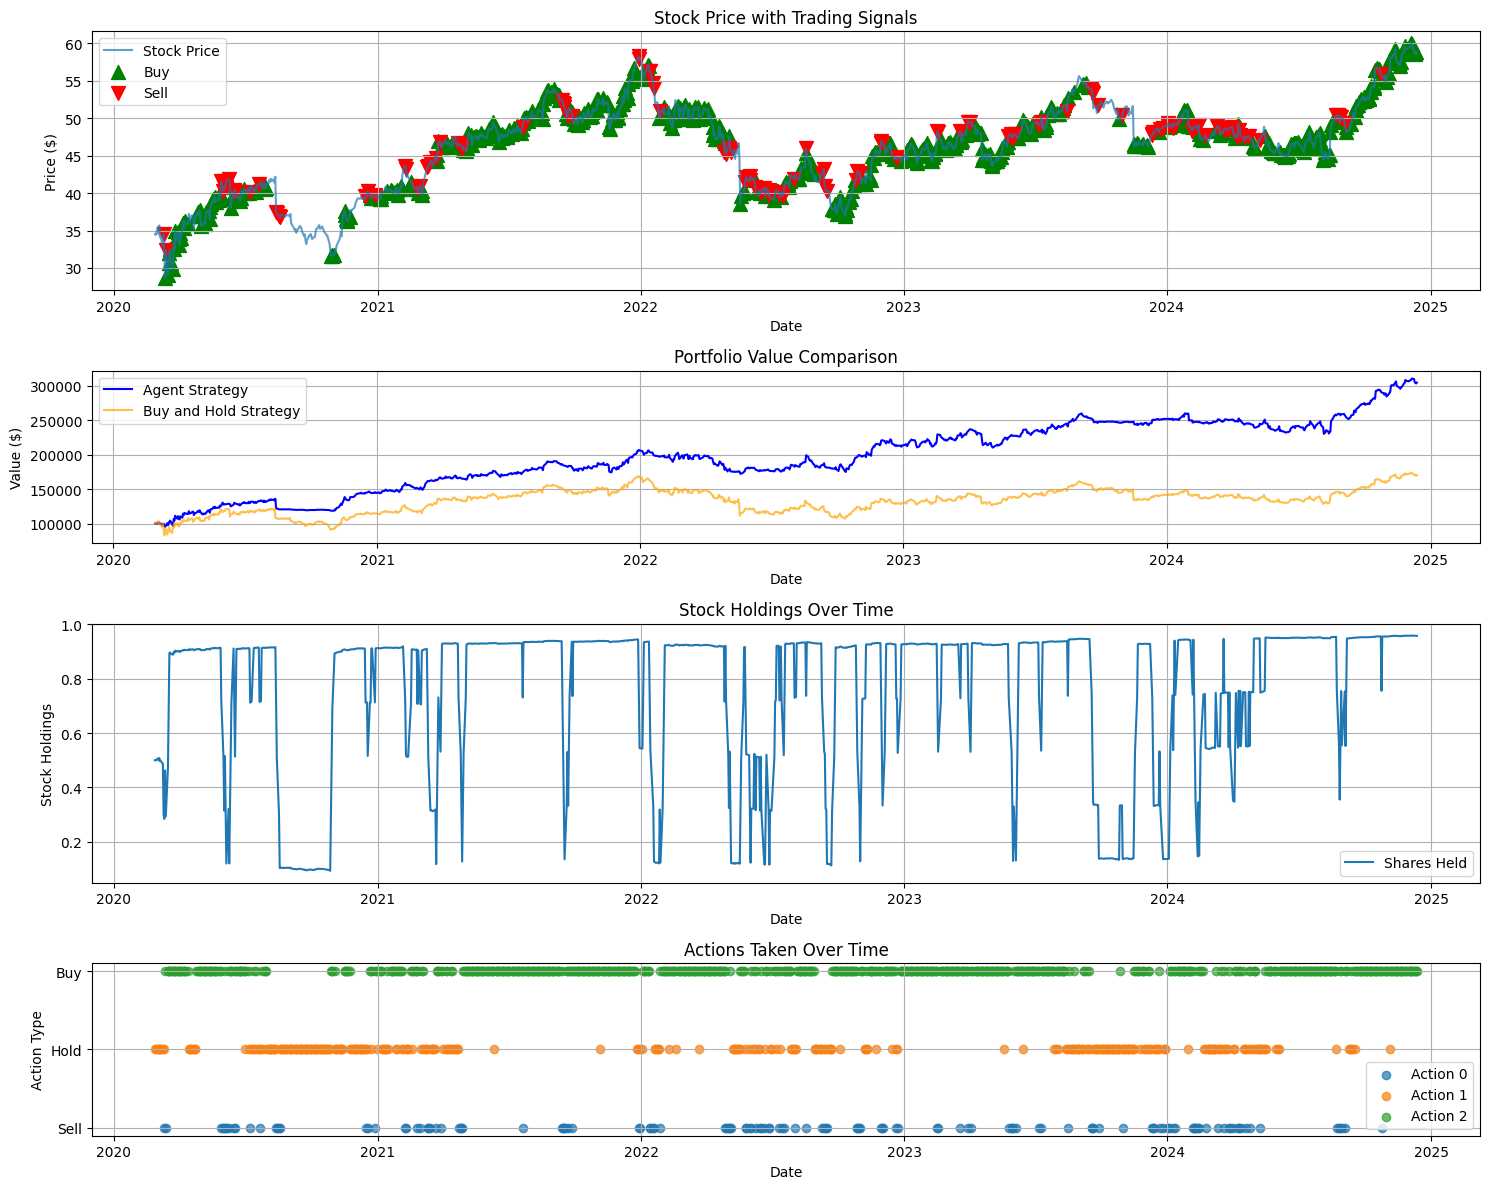


=== Performance Comparison ===
Initial Investment: $50,022.84

Agent Strategy:
Final Value: $304,488.43
Total Return: 508.70%
Number of Trades: 881

Buy and Hold Strategy:
Final Value: $169,918.71
Total Return: 239.68%

Risk Metrics:
Agent Sharpe Ratio: 0.93
Buy-Hold Sharpe Ratio: 0.54
Agent Maximum Drawdown: 16.84%
Buy-Hold Maximum Drawdown: 36.68%


In [3]:
# Create agent
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = DQNAgents(state_size, action_size, model_type='standard')

rewards_history, portfolio_history, best_state_dict = train_agent(env, agent, episodes=500)

agent.policy_net.load_state_dict(best_state_dict)

visualize_trades_with_benchmark(env, agent, df)

agent.policy_net.load_state_dict(best_state_dict)

visualize_trades_with_benchmark(env, agent, df)

                                Open       High        Low      Close  \
Date                                                                    
2020-02-27 00:00:00-05:00  35.583489  36.290331  34.488744  34.514606   
2020-02-28 00:00:00-05:00  33.359525  34.954229  33.057822  34.419788   
2020-03-02 00:00:00-05:00  34.609434  35.505915  33.549167  35.488674   
2020-03-03 00:00:00-05:00  35.566248  36.117933  34.230144  34.514606   
2020-03-04 00:00:00-05:00  35.100770  35.730032  34.307725  35.678310   

                             Volume  Dividends  Stock Splits        RSI  \
Date                                                                      
2020-02-27 00:00:00-05:00  51442900        0.0           0.0  18.407537   
2020-02-28 00:00:00-05:00  80188000        0.0           0.0  19.265994   
2020-03-02 00:00:00-05:00  48864300        0.0           0.0  21.311433   
2020-03-03 00:00:00-05:00  49294700        0.0           0.0  18.194541   
2020-03-04 00:00:00-05:00  30022100   

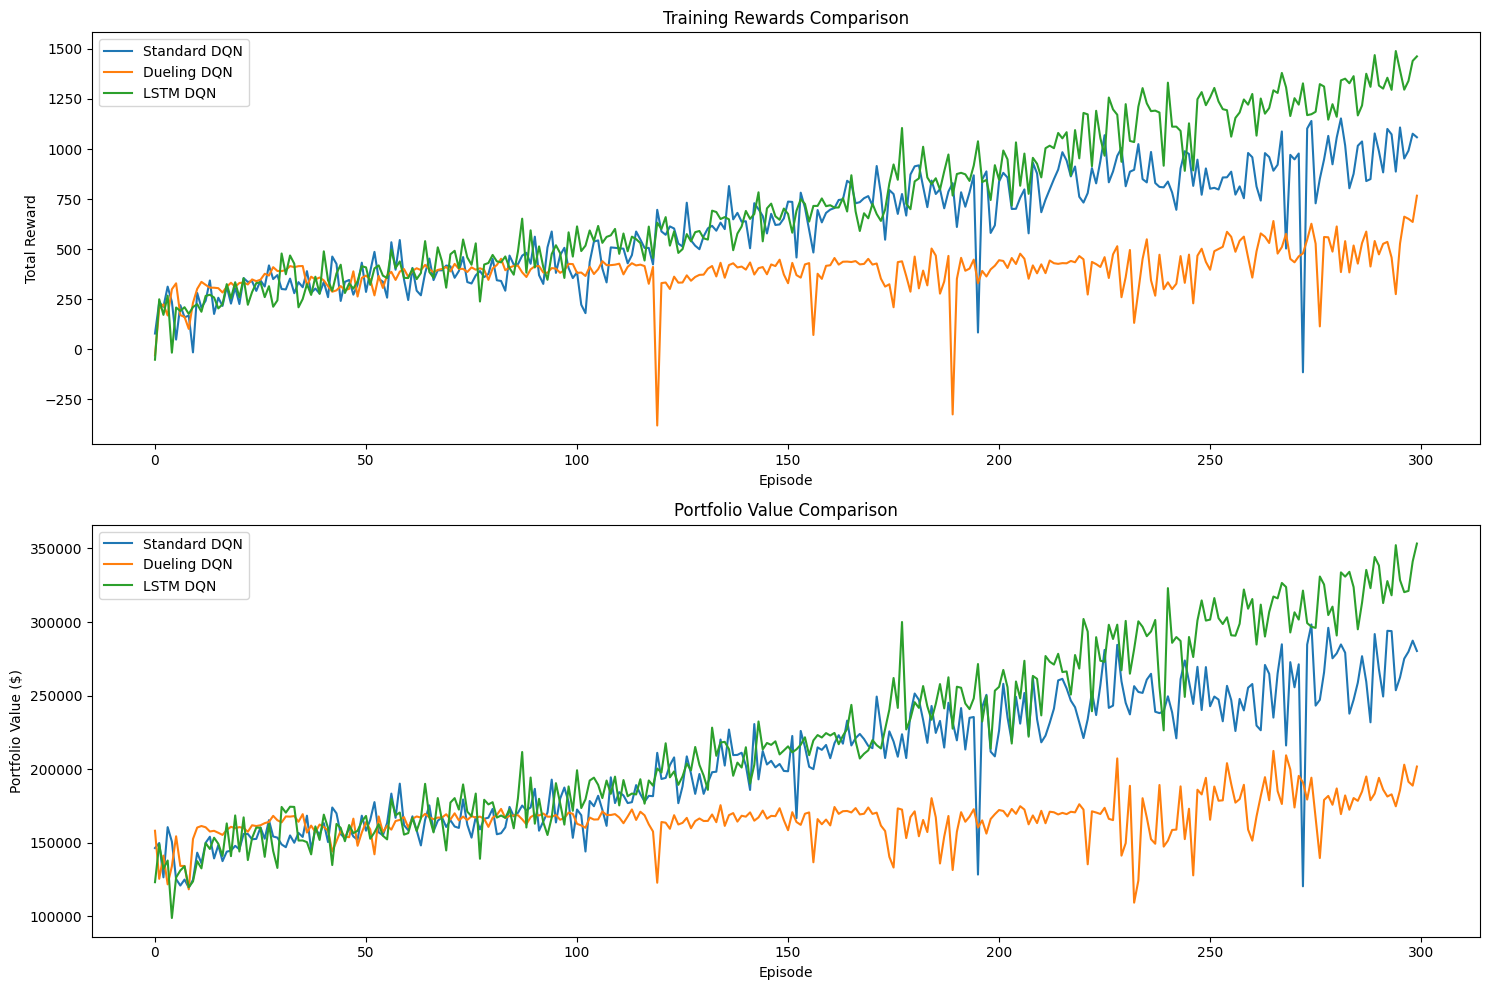


Final Statistics:

Standard DQN:
Final Reward: 1058.83
Final Portfolio Value: $280302.63
Average Reward: 621.92
Average Portfolio Value: $205678.33

Dueling DQN:
Final Reward: 767.12
Final Portfolio Value: $201738.88
Average Reward: 394.48
Average Portfolio Value: $166542.18

LSTM DQN:
Final Reward: 1462.43
Final Portfolio Value: $353343.18
Average Reward: 737.00
Average Portfolio Value: $223550.93


In [4]:
# Function to compare different models
import matplotlib.pyplot as plt
import numpy as np

def compare_models(env, episodes=100):
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    
    models = {
        'Standard DQN': DQNAgents(state_size, action_size, model_type='standard'),
        'Dueling DQN': DQNAgents(state_size, action_size, model_type='dueling'),
        'LSTM DQN': DQNAgents(state_size, action_size, model_type='lstm')
    }
    
    results = {}
    
    for model_name, agent in models.items():
        print(f"\nTraining {model_name}...")
        rewards_history, portfolio_history, _ = train_agent(env, agent, episodes=episodes)
        results[model_name] = {
            'rewards': rewards_history,
            'portfolio': portfolio_history
        }
    
    # Plot comparison results
    plt.figure(figsize=(15, 10))
    
    # Plot rewards
    plt.subplot(2, 1, 1)
    for model_name, data in results.items():
        plt.plot(data['rewards'], label=model_name)
    plt.title('Training Rewards Comparison')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.legend()
    
    # Plot portfolio values
    plt.subplot(2, 1, 2)
    for model_name, data in results.items():
        plt.plot(data['portfolio'], label=model_name)
    plt.title('Portfolio Value Comparison')
    plt.xlabel('Episode')
    plt.ylabel('Portfolio Value ($)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print final statistics
    print("\nFinal Statistics:")
    for model_name, data in results.items():
        final_reward = data['rewards'][-1]
        final_portfolio = data['portfolio'][-1]
        print(f"\n{model_name}:")
        print(f"Final Reward: {final_reward:.2f}")
        print(f"Final Portfolio Value: ${final_portfolio:.2f}")
        print(f"Average Reward: {np.mean(data['rewards']):.2f}")
        print(f"Average Portfolio Value: ${np.mean(data['portfolio']):.2f}")
    
    return results

df = prepare_data('CSCO')  # or any other stock
env = SingleStockEnv(df)
results = compare_models(env, episodes=300)